Math087 - Mathematical Modeling
===============================
[Tufts University](http://www.tufts.edu) -- [Department of Math](http://math.tufts.edu)  
[George McNinch](http://gmcninch.math.tufts.edu) <george.mcninch@tufts.edu>  
*Fall 2020*

Course material (Week 2): Multi-variable Optimization
--------------------------------------


# Multi-variable optimization

<!-- #region -->

## Optimization with functions of several variables

Consider a function $f(x,y)$ of two variables. You learned in
Calculus 3 (*vector calculus*) how to search for the points $(x,y)$ at which
$f$ assumes its maximum and minimum value. Let's briefly recap
this story.

Recall that for a function of a single variable, critical points are those points for which the tangent line is horizontal. In the single variable case, the criteria depends instead on the *tangent plane*.

Recall that the surface defined by $z = f(x,y)$ can be *parameterized* by $\mathbf{r}(x,y) = (x,y,f(x,y))$.
So a **normal vector** to this surface at a point $P = (x_0,y_0,f(x_0,y_0))$ on the surface is given
by the *cross product* $$\left (\dfrac{\partial \mathbf{r}}{\partial x} \times \dfrac{\partial \mathbf{r}}{\partial y}\right)_P.$$

Alternatively, consider $F(x,y,z) = z-f(x,y)$ so that the surface is defined by $F = 0$. Then the
gradient $\nabla F$ defines a normal vector at each point $P$, where $$(\nabla F)_P = \left(\dfrac{\partial F}{\partial x} \mathbf{i} + \dfrac{\partial F}{\partial y} \mathbf{j} + \dfrac{\partial F}{\partial z} \mathbf{k}\right)_P$$.

There is a nice discussion here: [**normal vector**](https://en.wikipedia.org/wiki/Normal_(geometry)).
Both points of view can be useful, but here they lead to the same formula. At the point $P=(x_0,y_0,f(x_0,y_0))$ one has a normal to the surface defined by $z = f(x,y)$ given by
$$\mathbf{n}\vert_P = \left ( \mathbf{i} + \dfrac{\partial f}{\partial x} \mathbf{k} \right )_P \times 
                        \left ( \mathbf{j} + \dfrac{\partial f}{\partial y} \mathbf{k} \right )_P 
                     = \left ( \mathbf{k}  - \dfrac{\partial f}{\partial x} \mathbf{i}                                                                                - \dfrac{\partial f}{\partial y} \mathbf{j} \right )_P$$
  
Now, the **tangent plane** at $P$ to the surface $z = f(x,y)$ is just
the plane orthogonal to this normal vector $\mathbf{n}_P$. Thus, the tangent plane at 
$P$ is horizontal -- parallel to the $x,y$-plan -- just in case this normal vector points in the $\mathbf{k}$ 
direction -- i.e. provided that
$$(\clubsuit) \quad \dfrac{\partial{f}}{\partial{x}} \bigg\vert_{(x_0,y_0)} = 0 \quad
\text{and} \quad  \dfrac{\partial{f}}{\partial{y}} \bigg\vert_{(x_0,y_0)} = 0$$
  
Mimicking the one variable case, we say that the points $(x_0,y_0)$ for which the tangent plane to  the surface $P=(x_0,y_0,f(x_0,y_0))$ is horizontal are the *critical points*.
  
So we find the critical points by simultaneously solving the equations $(\clubsuit)$.

There is a *second derivative test* which gives information about the "max/min status" of these critical points.
  
To use this test, consider the matrix of second partial derivatives
  $$ M(x_0,y_0) = \begin{pmatrix} 
        \dfrac{\partial^2 f}{\partial x^2} & \dfrac{\partial^2 f}{\partial x \partial y} \\
        \dfrac{\partial^2 f}{\partial y \partial x} & \dfrac{\partial^2 f}{\partial y^2} \\
      \end{pmatrix} \Bigg\vert_{(x_0,y_0)}.$$
      
For reasonable functions, the "mixed partials" $\dfrac{\partial^2 f}{\partial x \partial y}$ and $\dfrac{\partial^2 f}{\partial y \partial x}$ coincide.
  
Remember that the determinant of a $2 \times 2$ matrix $\begin{pmatrix} a & b \\ c & d \end{pmatrix}$ is $ad - bc$.
  
So, the *determinant* of $M$ is the expression
  
$$D=D(x_0,y_0) = \left(\dfrac{\partial^2 f}{\partial x^2}\cdot \dfrac{\partial^2 f}{\partial y^2}
 - \left[\dfrac{\partial^2 f}{\partial x \partial y}\right]^2\right) \bigg\vert_{(x_0,y_0)} $$
   
   
Suppose that $(x_0,y_0)$ is a critical point. 
- If $D>0$ and $\dfrac{\partial f}{\partial x}\bigg\vert_{(x_0,y_0)}<0$, then $f(x,y)$ has a relative maximum at $(x_0,y_0)$.
- If $D>0$ and $\dfrac{\partial f}{\partial x}\bigg\vert_{(x_0,y_0)}>0$, then $f(x,y)$ has a relative minimum at $(x_0,y_0)$.

- If $D<0$, then $f(x,y)$ has a saddle point at $(x_0,y_0)$.
- If $D=0$, the second derivative test is inconclusive. 




In [1]:
import matplotlib.pyplot as plt
import numpy as np

# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# https://matplotlib.org/3.3.1/gallery/mplot3d/surface3d.html

def draw_graph(f,x,y,x0,y0,elev_azim=[]):
    X,Y = np.meshgrid(x,y)

    fig = plt.figure(figsize=(20,20))
    for idx,(e,a) in enumerate(elev_azim,start=1):
        
        ax = fig.add_subplot(1,len(elev_azim),idx,projection='3d',elev=e,azim=a)
        ax.plot_wireframe(X,Y,f(X,Y))

        ax.plot(x,y0*np.ones(y.shape), zs= f(x,y0), color="red", linewidth=3)
        ax.plot(x0*np.ones(x.shape),y, zs= f(x0,y), color="red", linewidth=3)
    
    return fig


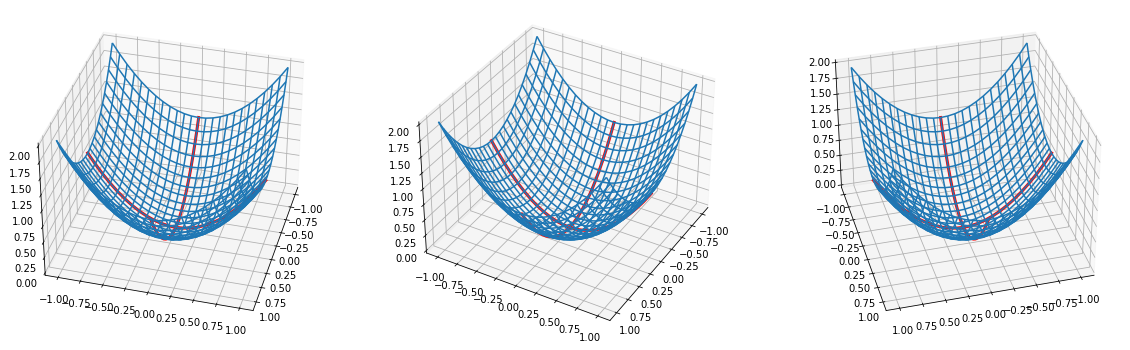

In [2]:
def f(x,y):
    return x**2 + y**2

af=draw_graph(f,
              x=np.linspace(-1,1,25),
              y=np.linspace(-1,1,25),
              x0=0,
              y0=0,
              elev_azim=[(35,15),(35,30),(35,75)])

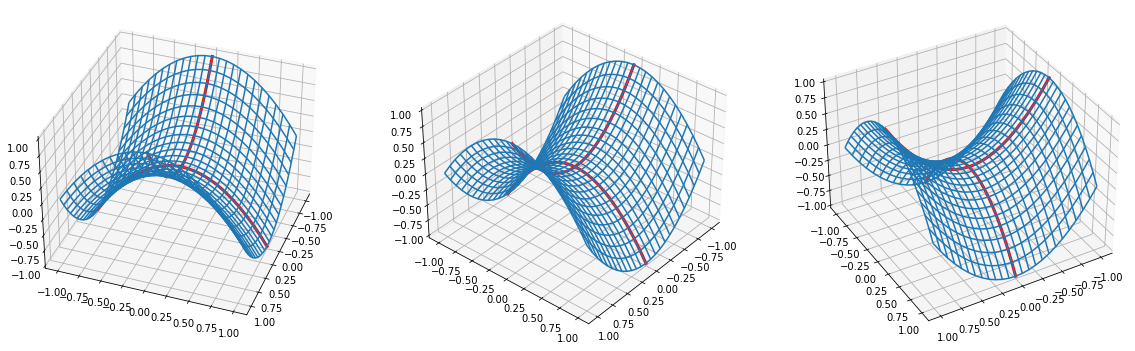

In [3]:
def g(x,y):
    return x**2 - y**2

ag=draw_graph(g,
              x=np.linspace(-1,1,25),
              y=np.linspace(-1,1,25),
              x0=0,
              y0=0,
              elev_azim=[(35,20),(35,40),(35,60)])

**Example:** Television manufacturer
-------------------------------------

A company that makes TV sets sells two models: a 19” set and a 21” set. 

Their annual production costs
are \\$ 195 per TV for the 19” model and \\$ 225 per TV for the 21” model, plus \\$ 400,000 per year
in fixed costs. 

They expect to sell their production to a single wholesaler who will pay a base
price of \\$ 339 per 19” TV and \$399 per 21” TV. The wholesaler recieves a volume discount calculated as 1¢ per 19”
TV + 0.3¢ per 21” TV for the 19” models and 1¢ per 21” TV + 0.4¢ per 19” TV for the 21” models.

How many 19” and 21” TVs should be produced to maximize the profits?

-------

Let’s go through our modeling procedure. Let’s set up the problem and ask the right questions.
What are our variables?
- $s$ = # of 19” TVs produced
- $t$ = # of 21” TVs produced
- $p$ = selling price of each 19” TV
- $q$ = selling price of each 21” TV
- $C$ = cost of production
- $R$ = total revenue of sales
- $P$ = total profit

What do we *know* to start with??

- $p(s,t) = 339 − 0.01s − 0.003t$ dollars
- $q(s,t) = 399 − 0.004s − 0.01t$ dollars
- $R(s,t) = ps + qt = 339s − 0.01s^2 − 0.003st + 399t − 0.004st − 0.01t^2$

  $= 339s + 399t − 0.01s^2 − 0.01t^2 − 0.007st \quad \text{dollars}$
  
- $C(s,t) = 400, 000 + 195s + 225t$ dollars
- $P(s,t) = R(s,t) - C(s,t)$

  $= −400, 000 + 144s + 174t − 0.01s^2 − 0.01t^2 − 0.007st$ dollars
  
  -------
  
  Of course, our goal is to maximize profit -- i.e. to find $(s_0,t_0)$ for which
  $P(s_0,t_0)$ is at a maximum.
  
  According to the discussion above, we should compute the partial derivitives of $P$ and simultaneously solve the equations
  $$0 = \dfrac{\partial P}{\partial s} = \dfrac{\partial P}{\partial t}$$
  
  So we need to solve the equations:
  
  $$\dfrac{\partial P}{\partial s} = 144 − 0.02s − 0.007t = 0$$

  $$\dfrac{\partial P}{\partial t} = 174 − 0.02t − 0.007s = 0$$
  
  This amounts to solving the matrix equation
  
  $$\begin{bmatrix} 0.02 & 0.007 \\ 0.007 & 0.02 \end{bmatrix} \begin{bmatrix} s \\ t \end{bmatrix}
    = \begin{bmatrix} 144 \\ 174 \end{bmatrix}$$
    
  which we can solve using *row reduction* on the corresponding augmented matrix:
  
  $$\left[\begin{array}{rr|r} 0.02 & 0.007 & 144 \\
                   0.007 & 0.02 & 174 \end{array} \right]
    \sim \left[\begin{array}{rr|r} 1 & .35 & 7200 \\
                   1 & 2.857 & 24857.14 \end{array} \right]
    \sim \left[\begin{array}{rr|r} 1 & .35 & 7200 \\
                   0 & 2.507 & 17657.14 \end{array} \right]
    \sim \left[\begin{array}{rr|r} 1 & .35 & 7200 \\
                   0 & 1 & 7043.135 \end{array} \right]
        \sim \left[\begin{array}{rr|r} 1 & 0 & 4734.9 \\
                   0 & 1 & 7043.135 \end{array} \right]$$
                   
 We find that the function $P$ has exactly one critical point which occurs at $(s_0,t_0) = (4735,7043)$.
 
Let's quickly pause and see how to solve this matrix equation using the computer: 

In [4]:
A= np.array([[.02,.007],[.007,.02]])
b=np.array([144,174])
np.linalg.solve(A,b)

array([4735.04273504, 7042.73504274])

 The matrix of second derivatives is
 $$ \begin{bmatrix} \dfrac{\partial^2 P}{\partial s^2} & \dfrac{\partial^2 P}{\partial s \partial t} \\
 \dfrac{\partial^2 P}{\partial s^2} & \dfrac{\partial^2 P}{\partial s \partial t} \end{bmatrix}
 = \begin{bmatrix}
    -0.02 & -0.007 \\
    -0.007 & -0.02
   \end{bmatrix}$$
 which has determinant $(0.02)^2 - (.007)^2 > 0$. 
 
 Since $\dfrac{\partial^2 P}{\partial s^2} = -0.02 < 0$, the second derivative test shows that $P$ has is local maximum at $(s_0,t_0)$, and we conclude that profit is maximized there.
 
 (Technically, we should check for  minima "on the boundary" but in this case that would be the point $(0,0)$ which clearly doesn't maximize $P$).
 
 Let's produce a (or a few...) graph(s) to confirm our work:

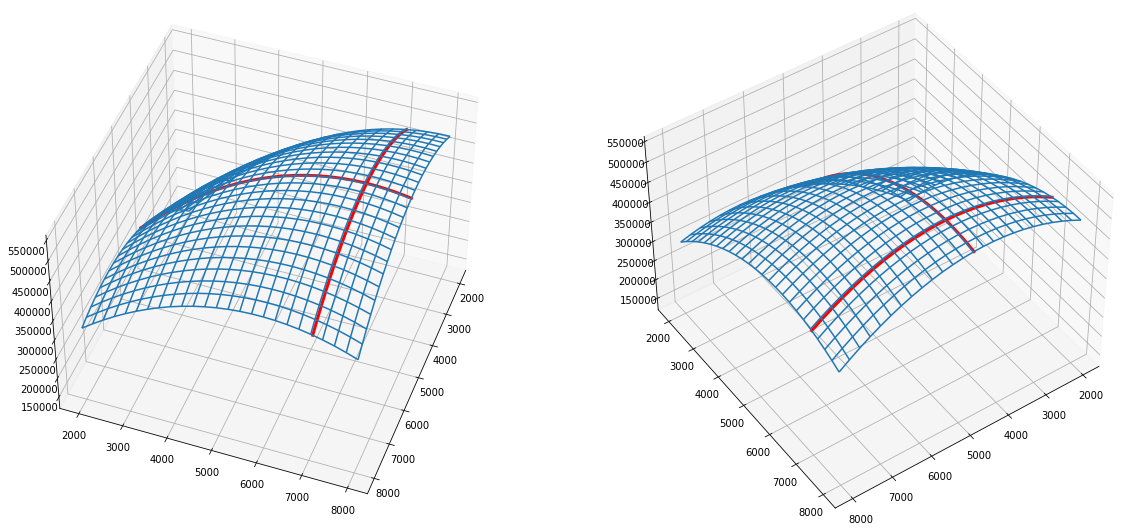

In [5]:

s = np.linspace(2000,8000,25)
t = np.linspace(2000,8000,25)


def p(s,t):
    return -400000 + 144*s + 174*t - 0.01*s**2 - 0.01*t**2 - .007*s*t

a=draw_graph(p,
             x=s,
             y=t,
             x0=4735,
             y0=7043,
             elev_azim=[(45,20),(45,55)])



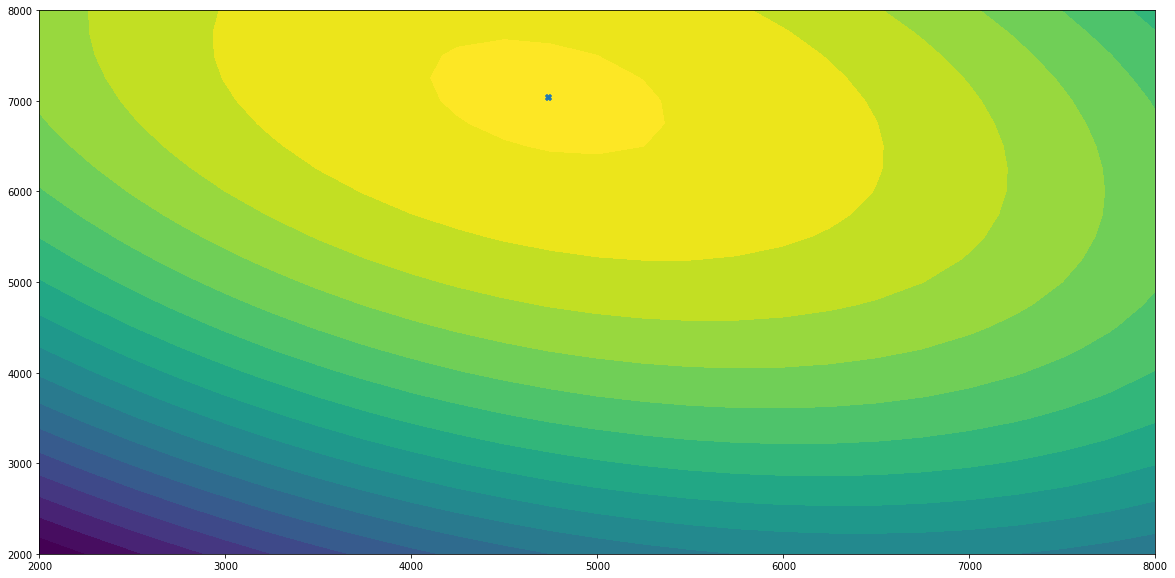

In [6]:
# countour plot

S,T = np.meshgrid(s,t)

figc = plt.figure(figsize=(20,10))
axc = figc.add_subplot()
axc.contourf(S,T,p(S,T),levels=20
             , extend='both')
axc.scatter(4735,7043,marker="X")

Sensitivity Analysis (the television example, continued)
---------------------------------------------------------

Just as in the single-variable case, we should be able to perform *Sensitivity Analysis* for our optimization problems.

Let’s start by picking a parameter we want to change.

**Definition**(Price Elasticity). Let the *Price Elasticity* parameter, $a$, be the amount the
selling price of say the 19” TVs decreases per 19” TV sold.

We started with $a = 0.01$.

Using this let’s rewrite the Profit equation with $a$:

$$P(s,t) = 144s + 174t − as^2 − 0.01t^2 − 0.007st − 400000$$

We now look for optimal values $s = s(a)$ and $t = t(a)$ depending on $a$.

We need to solve the system:
$$\left\{\begin{matrix}
    0 & = \dfrac{\partial P}{\partial s} = 144 -2as - 0.007t \\
    0 & = \dfrac{\partial P}{\partial t}= 174 -.02t - 0.007s
  \end{matrix}\right .$$
  
  Solving this system, find that $s = s(a) = \dfrac{144-0.007t}{2a}$ so that
  $$174 - 0.02t - 0.007\cdot \dfrac{144-0.007t}{2a} = 0$$
  We now find that
  $$t = 8,700 - \dfrac{581,700}{40,000a -49}$$
  and
  $$s = \dfrac{1,662,000}{40,000a-49}$$
  
  Now we check the sensitivity:
  
  $$S(s,a) = \dfrac{ds}{da} \cdot \dfrac{a}{s} \quad \text{and} \quad
    S(t,a) = \dfrac{dt}{da} \cdot \dfrac{a}{t}$$
    
 Thus
 $$S(s,a) = \dfrac{66,480,000,000}{(40,000a - 49)^2} \cdot
            \dfrac{40,000a^2 - 49a}{1,662,000}$$
 and
 $$S(t,a) = \dfrac{23,268,000,000}{(40,000a - 40)^2} \cdot 
            \dfrac{40,000a^2 - 49a}{8,700 \cdot (40,000a - 49) - 581,700}$$
            
The sensitivity near our guess of $a = 0.01$ is thus
$$S(s,0.01) \approx -1.1 \quad \text{and} \quad
  S(t,0,01) \approx 0.2$$
**Interpretation:** If the price elasticity increases by 10% (i.e. the warehouse receives a bigger bulk discount) the optimal value of $s$ decreases by 11% and the optimal value of $t$ increases by 2.7%